In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import tensorflow as tf
import keras
from keras.models import *
from keras.layers import *

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.optimizers import Adam

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#autenticación de credenciales google
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#mi archivo en drive
fileDownloaded = drive.CreateFile({'id':'1_f6bIWzjMJjO7z_q3KHulSzm1Ym-A7gr'})

In [ ]:
# se cargan las imaganes usadas en el TP2
from zipfile import ZipFile
fileDownloaded.GetContentFile('imagenes.zip')
! unzip /content/imagenes.zip -d /content/imagenes

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: /content/imagenes/imagenes/train/angry/Training_81541574.jpg  
  inflating: /content/imagenes/__MACOSX/imagenes/train/angry/._Training_81541574.jpg  
  inflating: /content/imagenes/imagenes/train/angry/Training_50120123.jpg  
  inflating: /content/imagenes/__MACOSX/imagenes/train/angry/._Training_50120123.jpg  
  inflating: /content/imagenes/imagenes/train/angry/Training_60016886.jpg  
  inflating: /content/imagenes/__MACOSX/imagenes/train/angry/._Training_60016886.jpg  
  inflating: /content/imagenes/imagenes/train/angry/Training_68690730.jpg  
  inflating: /content/imagenes/__MACOSX/imagenes/train/angry/._Training_68690730.jpg  
  inflating: /content/imagenes/imagenes/train/angry/Training_73515932.jpg  
  inflating: /content/imagenes/__MACOSX/imagenes/train/angry/._Training_73515932.jpg  
  inflating: /content/imagenes/imagenes/train/angry/Training_32153813.jpg  
  inflating: /content/imagenes/__MACOSX/im

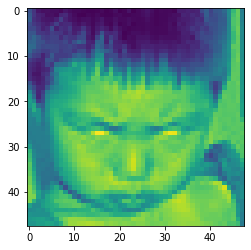

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(mpimg.imread("/content/imagenes/imagenes/train/angry/Training_10118481.jpg"))
plt.show()

In [ ]:
# se agrupan en train y test desde el directorio
datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255,
     horizontal_flip=2,
    vertical_flip=2
)

# https://keras.io/api/preprocessing/image/#flowfromdirectory-method

train_generator = datagen.flow_from_directory(
        '/content/imagenes/imagenes/train',  # Directorio donde están las imágenes
        target_size=(48, 48), # Recorta a 48 x 48
        #color_mode = 'grayscale',
        batch_size=256,
        classes = ['angry','happy','neutral'], # Clases
        )
test_generator = datagen.flow_from_directory(
        '/content/imagenes/imagenes/test',  # Directorio donde están las imágenes
        target_size=(48,48), # Recorta a 48 x 48
        #color_mode = 'grayscale',
        batch_size=128,
        classes = ['angry','happy','neutral'], # Clases
        )

Found 16175 images belonging to 3 classes.
Found 3965 images belonging to 3 classes.


In [ ]:
#y_train=train_generator.classes

In [ ]:
# Con el fin de dividir en en X y Y se utiliza next
X_train, y_train = next(train_generator)
X_test, y_test = next(test_generator)

#AUTOKERAS

In [ ]:
!pip install autokeras -q -U
!pip install keras-tuner -q -U

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import autokeras as ak
import keras_tuner as kt

In [ ]:
# Inicializa el clasificador de imágenes
clf = ak.ImageClassifier(overwrite=True, max_trials=1, metrics=["accuracy"])

# Entrena el modelo
history = clf.fit(X_train, y_train, validation_split=0.2, epochs=12)

#con un epochs de 3 se optiene un accuracy de 0.65 maxt=1, validation 0.2
#con un epochs de 5 se optiene un accuracy de 0.7969
# con un epochs de 10 se optiene un accuracy de 0.90
# con max_trials 2 se demora (2 min por epochs) 0.5039
# con 20 da un accuracy de 0.99- es muy probable que sobreajuste
# con 10 epoch y validation 0.3  accu 0.96

Trial 1 Complete [00h 00m 28s]
val_loss: 1.1559693813323975

Best val_loss So Far: 1.1559693813323975
Total elapsed time: 00h 00m 28s
INFO:tensorflow:Oracle triggered exit
Epoch 1/12
8/8 [==============================] - 2s 238ms/step - loss: 1.1842 - accuracy: 0.3984
Epoch 2/12
8/8 [==============================] - 2s 239ms/step - loss: 0.9420 - accuracy: 0.5898
Epoch 3/12
8/8 [==============================] - 2s 235ms/step - loss: 0.8043 - accuracy: 0.6562
Epoch 4/12
8/8 [==============================] - 2s 239ms/step - loss: 0.6976 - accuracy: 0.6953
Epoch 5/12
8/8 [==============================] - 2s 240ms/step - loss: 0.5690 - accuracy: 0.7969
Epoch 6/12
8/8 [==============================] - 2s 240ms/step - loss: 0.4116 - accuracy: 0.8828
Epoch 7/12
8/8 [==============================] - 2s 243ms/step - loss: 0.2900 - accuracy: 0.9258
Epoch 8/12
8/8 [==============================] - 2s 239ms/step - loss: 0.1932 - accuracy: 0.9688
Epoch 9/12
8/8 [============================

In [ ]:
# Predice con el mejor modelo encontrado
clf.predict(X_test)

4/4 [==============================] - 0s 62ms/step


array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1

In [ ]:
# Evalúa el mejor modelo con los datos de testing
clf.evaluate(X_test, y_test)
#al realizar la evaluacion se optiene un accuracy de 0.47
# con 10 epoch 0.53

4/4 [==============================] - 0s 60ms/step - loss: 1.9244 - accuracy: 0.4844


[1.9243639707565308, 0.484375]

In [ ]:
input_node = ak.ImageInput()

output_node = ak.Normalization()(input_node)
output_node = ak.ImageAugmentation(horizontal_flip=True, vertical_flip=False)(output_node)

output_node = ak.ConvBlock(kernel_size=4, num_blocks=4, num_layers=kt.engine.hyperparameters.Choice('num_layers', [1, 2, 3]), dropout=0.4)(output_node)
#output_node = ak.ResNetBlock(version="v2")(output_node)

output_node = ak.ClassificationHead()(output_node)

clf = ak.AutoModel(inputs=input_node, outputs=output_node, overwrite=True, max_trials=1)
clf.fit(X_train, y_train, validation_split=0.2, epochs=40)

#se optiene un accuracy de 0.3772 con 5 epochs
# se optiene un accuracy de 0.4023
#al realizar la evaluacion se optiene un accuracy de 0.47

# al realizarla con max2 0.429
#con 10 epochs 0.49
#al realizar con 20 epochs evaluacion se optiene un accuracy de 0.54
# accuracy 0.47

Trial 1 Complete [00h 00m 47s]
val_loss: 1.0991131067276

Best val_loss So Far: 1.0991131067276
Total elapsed time: 00h 00m 47s
INFO:tensorflow:Oracle triggered exit
Epoch 1/40
8/8 [==============================] - 4s 415ms/step - loss: 1.0980 - accuracy: 0.4062
Epoch 2/40
8/8 [==============================] - 3s 413ms/step - loss: 1.0958 - accuracy: 0.4297
Epoch 3/40
8/8 [==============================] - 3s 413ms/step - loss: 1.0930 - accuracy: 0.4219
Epoch 4/40
8/8 [==============================] - 3s 413ms/step - loss: 1.0955 - accuracy: 0.4297
Epoch 5/40
8/8 [==============================] - 3s 415ms/step - loss: 1.0881 - accuracy: 0.4297
Epoch 6/40
8/8 [==============================] - 3s 414ms/step - loss: 1.0848 - accuracy: 0.4297
Epoch 7/40
8/8 [==============================] - 3s 416ms/step - loss: 1.0790 - accuracy: 0.4297
Epoch 8/40
8/8 [==============================] - 3s 416ms/step - loss: 1.0800 - accuracy: 0.4297
Epoch 9/40
8/8 [==============================] - 

#KERAS TUNER

In [ ]:
!pip install -q -U keras-tuner

In [ ]:
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
X_train, y_train = next(train_generator)
X_test, y_test = next(test_generator)


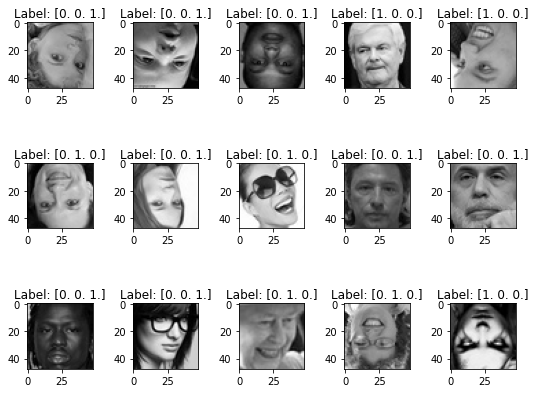

In [ ]:
num_row = 3
num_col = 5
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title('Label: {}'.format(y_train[i]))
plt.tight_layout()
plt.show()

In [ ]:
#b = np.array([[0., 0., 1.], [1., 0., 0.]])    # 2 x 3 array

y_train==1
y_tr=np.where(y_train)[1]+1
y_test==1
y_te=np.where(y_test)[1]+1


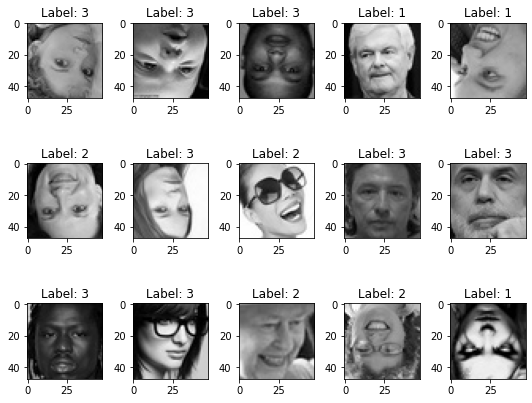

In [ ]:
num_row = 3
num_col = 5
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title('Label: {}'.format(y_tr[i]))
plt.tight_layout()
plt.show()

In [ ]:
print(X_train.shape, y_tr.shape, X_test.shape, y_te.shape)
#Xtrain

(256, 48, 48, 3) (256,) (128, 48, 48, 3) (128,)


In [ ]:
def build_model(hp):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(48, 48,3)))

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value=32, max_value=256, step=32)
  model.add(keras.layers.Dense(units=hp_units, activation='relu'))
  model.add(keras.layers.Dense(10))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

In [ ]:
tuner = kt.RandomSearch(build_model, objective="val_accuracy", max_trials=10, overwrite=True)


In [ ]:
tuner.search(X_train, y_tr, epochs=10, validation_split=0.2)

# Obtener los mejores hiperparámetros
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

for p in ["units", "learning_rate"]:
    print(p, ":", best_hps.get(p))

Trial 10 Complete [00h 00m 02s]
val_accuracy: 0.42307692766189575

Best val_accuracy So Far: 0.5961538553237915
Total elapsed time: 00h 00m 25s
INFO:tensorflow:Oracle triggered exit
units : 192
learning_rate : 0.001


In [ ]:
model = tuner.hypermodel.build(best_hps)

# Reentrenamos el modelo
history = model.fit(X_train, y_tr, epochs=40, validation_split=0.2)

Epoch 1/40
7/7 [==============================] - 1s 43ms/step - loss: 4.1740 - accuracy: 0.3088 - val_loss: 2.2326 - val_accuracy: 0.3654
Epoch 2/40
7/7 [==============================] - 0s 17ms/step - loss: 2.4218 - accuracy: 0.4363 - val_loss: 3.6164 - val_accuracy: 0.2115
Epoch 3/40
7/7 [==============================] - 0s 16ms/step - loss: 2.1468 - accuracy: 0.3873 - val_loss: 3.0946 - val_accuracy: 0.3654
Epoch 4/40
7/7 [==============================] - 0s 17ms/step - loss: 1.6823 - accuracy: 0.4363 - val_loss: 1.4437 - val_accuracy: 0.4038
Epoch 5/40
7/7 [==============================] - 0s 15ms/step - loss: 1.2164 - accuracy: 0.5147 - val_loss: 1.4027 - val_accuracy: 0.3077
Epoch 6/40
7/7 [==============================] - 0s 19ms/step - loss: 1.0928 - accuracy: 0.5392 - val_loss: 1.3609 - val_accuracy: 0.4231
Epoch 7/40
7/7 [==============================] - 0s 16ms/step - loss: 0.9672 - accuracy: 0.5784 - val_loss: 1.4318 - val_accuracy: 0.3654
Epoch 8/40
7/7 [===========

In [ ]:
eval_result = model.evaluate(X_test, y_te)
print("[test loss, test accuracy]:", eval_result)

# accuracy 0.52 con 256
# accuracy 0.47 con 512
# acuracy 0.460 con 256  y num_trials=5
# accuracy 0.52 con 256

4/4 [==============================] - 0s 7ms/step - loss: 1.3188 - accuracy: 0.5312
[test loss, test accuracy]: [1.3187766075134277, 0.53125]
